In [1]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')
PG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.625000,15.437500,15.468750,15.593750,3318400.0,6.320252
1995-01-04,15.656250,15.312500,15.531250,15.468750,2218800.0,6.269589
1995-01-05,15.437500,15.218750,15.375000,15.250000,2319600.0,6.180927
1995-01-06,15.406250,15.156250,15.156250,15.281250,3438000.0,6.193593
1995-01-09,15.406250,15.187500,15.343750,15.218750,1795200.0,6.168259
...,...,...,...,...,...,...
2020-05-04,117.199997,115.000000,117.089996,115.769997,5636000.0,115.769997
2020-05-05,117.260002,115.209999,115.800003,116.010002,5425200.0,116.010002
2020-05-06,116.139999,112.889999,115.540001,113.099998,7892200.0,113.099998


In [4]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,6.320252
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,6.269589
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,6.180927
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,6.193593
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,6.168259


In [5]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-04,117.199997,115.000000,117.089996,115.769997,5636000.0,115.769997
2020-05-05,117.260002,115.209999,115.800003,116.010002,5425200.0,116.010002
2020-05-06,116.139999,112.889999,115.540001,113.099998,7892200.0,113.099998
2020-05-07,114.139999,111.820000,114.059998,112.169998,8762800.0,112.169998
2020-05-08,116.300003,113.389999,113.519997,115.949997,9279900.0,115.949997


## Simple Rate of Return

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [6]:
PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1
print (PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2020-05-04   -0.008988
2020-05-05    0.002073
2020-05-06   -0.025084
2020-05-07   -0.008223
2020-05-08    0.033699
Name: simple_return, Length: 6383, dtype: float64


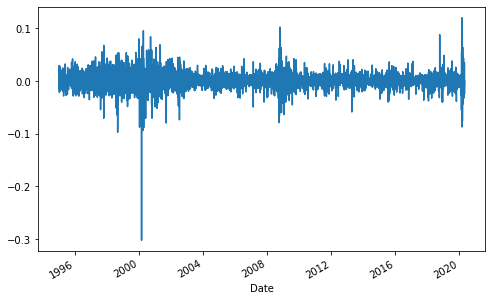

In [7]:
PG['simple_return'].plot(figsize=(8, 5))
plt.show()

In [8]:
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

0.000559882734832951

In [9]:
avg_returns_a = PG['simple_return'].mean() * 250
avg_returns_a

0.13997068370823776

In [11]:
print (str(round(avg_returns_a, 5) * 100) + ' %')

13.997000000000002 %


## Log Returns

It is preferable to use simple returns when we calculate the returns of multiple securities in the same period.

On the other hand log returns are a better choice when we have only one security and calculated return
over multiple time periods. 
*** Single Stock ==>> Log Returns

$$
ln(\frac{P_t}{P_{t-1}})
$$

In [12]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,6.320252,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,6.269589,-0.008016
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,6.180927,-0.014142
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,6.193593,0.002049
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,6.168259,-0.004090


In [13]:
# Numpy offers the possibility of vectorized computation.
# Vectorization: the ability to organize several kinds of data processing tasks as array expressions.
# The benefit is that this package offers the possibility of vectorized computation this term refers to the 
# ability to organize several kinds of data processing tasks as array expressions vectors matrices or 
# multi-dimensional arrays.
# Vectorization <<--->> Array Programming
PG['log_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
print (PG['log_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002047
1995-01-09   -0.004099
                ...   
2020-05-04   -0.009029
2020-05-05    0.002071
2020-05-06   -0.025404
2020-05-07   -0.008257
2020-05-08    0.033143
Name: log_return, Length: 6383, dtype: float64


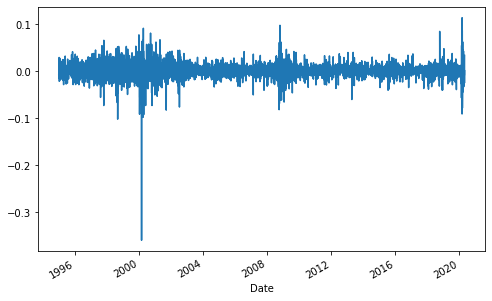

In [14]:
PG['log_return'].plot(figsize=(8, 5))
plt.show()

In [13]:
log_return_d = PG['log_return'].mean()
log_return_d

0.00044612566594289796

In [14]:
log_return_a = PG['log_return'].mean() * 250
log_return_a

0.11153141648572448

In [15]:
print (str(round(log_return_a, 5) * 100) + ' %')

11.153 %
